<a href="https://colab.research.google.com/github/jaweed3/TensorFlow_Training/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation Regression with TensorFlow
---

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [ ]:
!wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip -O dataset.zip

--2025-02-17 15:02:27--  https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [ <=>                ]  14.52K  --.-KB/s    in 0.04s   

2025-02-17 15:02:27 (374 KB/s) - ‘dataset.zip’ saved [14873]



#### Another way to import the dataset

In [ ]:
# Another technique for importing the dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
                 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
!unzip '/content/dataset.zip'

Archive:  /content/dataset.zip
  inflating: Index                   
  inflating: auto-mpg.data           
  inflating: auto-mpg.data-original  
  inflating: auto-mpg.names          


In [ ]:
columns_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
data = pd.read_csv('auto-mpg.data-original', skipinitialspace=True,
                   na_values='?', comment='\t', sep=' ', names=columns_names)

data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [ ]:
dataset = data.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0
405,31.0,4.0,119.0,82.0,2720.0,19.4,82.0,1.0


In [ ]:
# Performing Explanatory Data Analysis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     406 non-null    float64
 2   Displacement  406 non-null    float64
 3   Horsepower    400 non-null    float64
 4   Weight        406 non-null    float64
 5   Acceleration  406 non-null    float64
 6   Model Year    406 non-null    float64
 7   Origin        406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [ ]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# Searching for missing value
dataset.isna().sum()

,0
MPG,8
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
dataset = dataset.dropna()

In [ ]:
for i in dataset.columns:
  print("Column : ", data[i])
  print(dataset[i].value_counts())
  print("***"* 30)

Column :  0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: MPG, Length: 406, dtype: float64
MPG
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 127, dtype: int64
******************************************************************************************
Column :  0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
401    4.0
402    4.0
403    4.0
404    4.0
405    4.0
Name: Cylinders, Length: 406, dtype: float64
Cylinders
4.0    199
8.0    103
6.0     83
3.0      4
5.0      3
Name: count, dtype: int64
******************************************************************************************
Column :  0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
401    140.0
402     97.0
403    135.0
404    120.0
405    119.0
Name: Displacement, Length: 406, dtype: float64
Displ

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

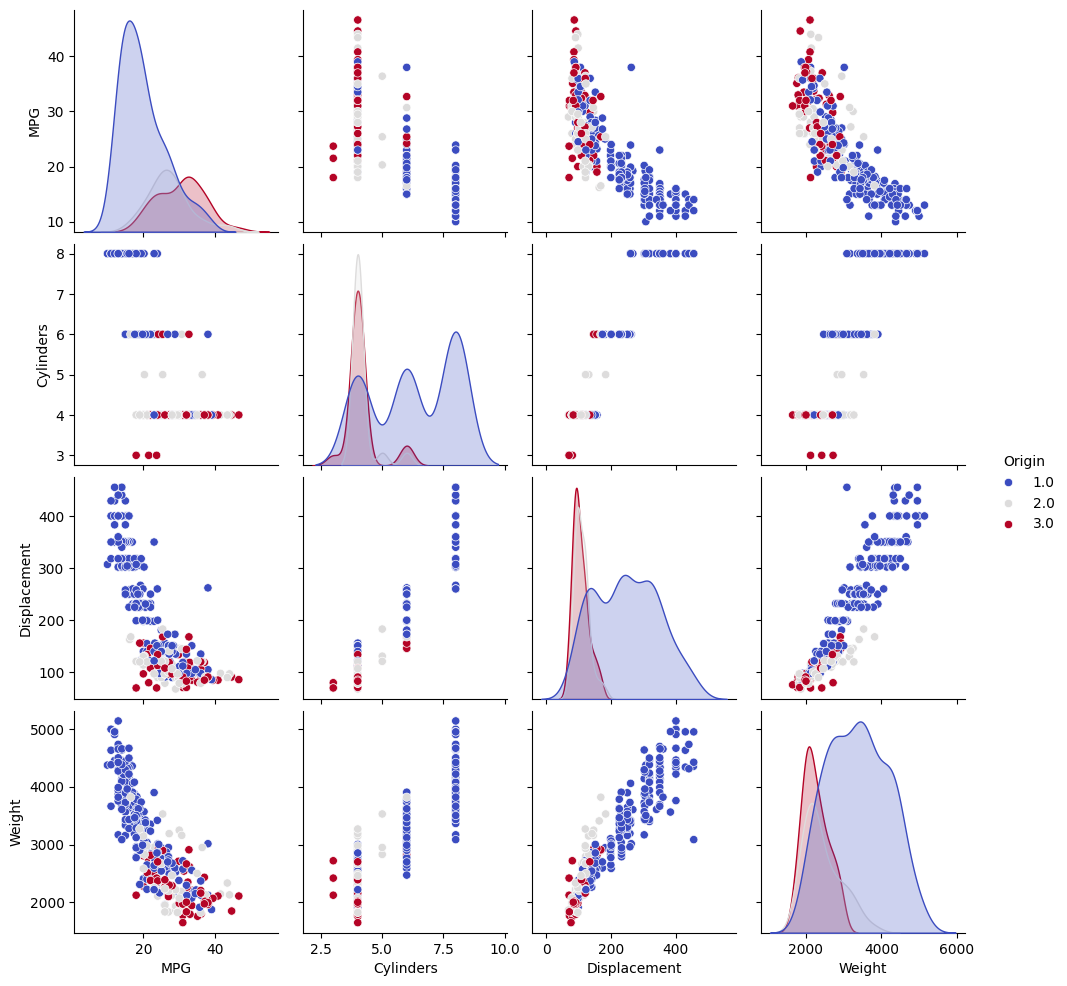

In [ ]:
# Ploting the Distribution of Dataset
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Origin']], diag_kind='kde', hue='Origin', palette='coolwarm')

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Origin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [ ]:
train_features = train_dataset.copy() # Using Copied Dataset
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
153,4.0,90.0,75.0,2125.0,14.5,74.0,1.0
289,4.0,140.0,88.0,2890.0,17.3,79.0,1.0
76,8.0,350.0,160.0,4456.0,13.5,72.0,1.0
386,4.0,105.0,63.0,2125.0,14.7,82.0,1.0
338,4.0,97.0,67.0,2145.0,18.0,80.0,3.0
...,...,...,...,...,...,...,...
288,6.0,200.0,85.0,2990.0,18.2,79.0,1.0
236,8.0,400.0,180.0,4220.0,11.1,77.0,1.0
157,4.0,108.0,93.0,2391.0,15.5,74.0,3.0
152,4.0,83.0,61.0,2003.0,19.0,74.0,3.0


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1) # Membuat layer normalisasi
normalizer.adapt(np.array(train_features)) # Computing the mean and variance of dataset

In [ ]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    1.573]]
[[     2.88   10850.414   1446.699 709896.8        7.755     13.467
       0.64 ]]


In [ ]:
first = np.array(train_features[:1]) # Mengambil baris paling atas
first

array([[   4. ,   90. ,   75. , 2125. ,   14.5,   74. ,    1. ]])

In [ ]:
with np.printoptions(precision=2, suppress=True): # Menghitung fitur pertama
  print('First Example :', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First Example : [[   4.    90.    75.  2125.    14.5   74.     1. ]]

Normalized: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.72]]


## Steps in single-variable linear regression model

1. Normalize the 'Horsepower' input features using the `tf.keras.keras.Normalization` preprocessing layer.
2. Apply a linear transformation to produce 1 output using a linear layer (`tf.keras.layers.Dense)`

In [ ]:
horsepower = np.array(train_features['Horsepower']) # Mengubah fitur horsepower untuk menjadi array numpy

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower) # menghitung mean dan variance dari feature tadi

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
horsepower_normalizer, horsepower # Cross-check the dataset

(<Normalization name=normalization_1, built=True>,
 array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
        180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
         90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
         67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
         78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
         76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
        215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
        145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
         65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
         70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
        170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
         67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
         95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,

# Performing Single-Feature and 1 Output
---

In [ ]:
horsepower_model = tf.keras.Sequential([ # Membuat model dengan layer sequential berisi layer normalisasi
    horsepower_normalizer, # dan neuron 1
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [ ]:
horsepower_model.predict(horsepower[:10]) #

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[-0.389],
       [-0.22 ],
       [ 0.719],
       [-0.546],
       [-0.494],
       [-0.194],
       [-0.585],
       [-0.494],
       [-0.129],
       [-0.22 ]], dtype=float32)

In [ ]:
horsepower_model.compile( # Mengonfigurasikan prosees pelatihan menggunakan `Model.compile()`
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    # Suppress Logging
    verbose=1,
    # Calculate validation result on 20% of training data.
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 22.6346 - val_loss: 22.9368
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.4649 - val_loss: 22.1366
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.4262 - val_loss: 21.3366
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.4904 - val_loss: 20.5366
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.5866 - val_loss: 19.7366
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.1131 - val_loss: 18.9367
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.0484 - val_loss: 18.1369
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.2031 - val_loss: 17.3367
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.3211 - val_loss: 16.5367
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.8672 - val_loss: 15.7369
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7917 - val_loss: 14.9371
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.805858,4.208333,95
96,3.802920,4.171449,96
97,3.803376,4.163133,97
98,3.805788,4.164185,98
99,3.807422,4.167550,99


In [ ]:
def plot_loss(history):
  plt.figure(figsize=(12, 8))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 30])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

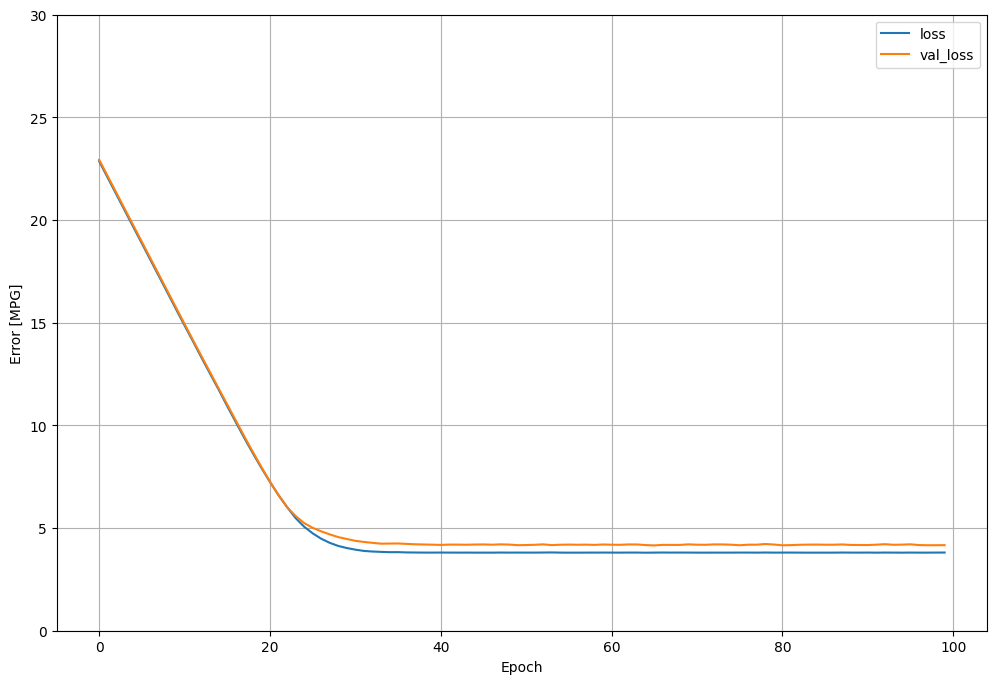

In [ ]:
plot_loss(history)

In [ ]:
test_result = {}

test_result['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Horsepower'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

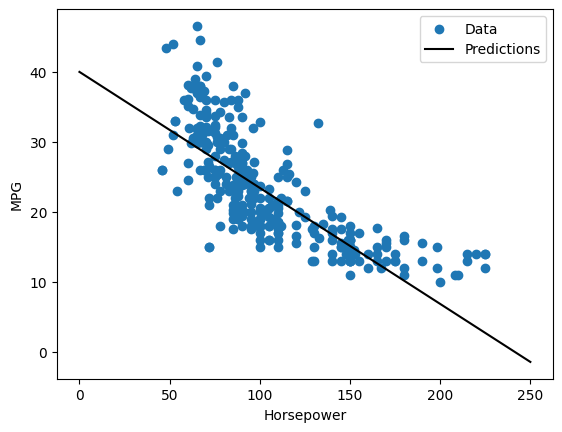

In [ ]:
plot_horsepower(x, y)

# Linear Regression with Multiple Inputs
---

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[ 0.711],
       [ 0.451],
       [ 0.453],
       [ 1.206],
       [-1.507],
       [ 0.374],
       [-1.614],
       [-1.435],
       [ 0.152],
       [-2.115]], dtype=float32)

In [ ]:
linear_model.layers[1].kernel

<Variable path=sequential_1/dense_1/kernel, shape=(7, 1), dtype=float32, value=[[-0.271]
 [ 0.487]
 [ 0.089]
 [-0.391]
 [-0.471]
 [ 0.223]
 [-0.798]]>

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 22.4795 - val_loss: 22.9943
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.2572 - val_loss: 22.2226
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.1320 - val_loss: 21.4357
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.1723 - val_loss: 20.6405
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.7694 - val_loss: 19.8553
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.1556 - val_loss: 19.0616
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.6486 - val_loss: 18.2696
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.6811 - val_loss: 17.4825
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4036 - val_loss: 16.6895
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.2385 - val_loss: 15.9334
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.0446 - val_loss: 15.2199
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.

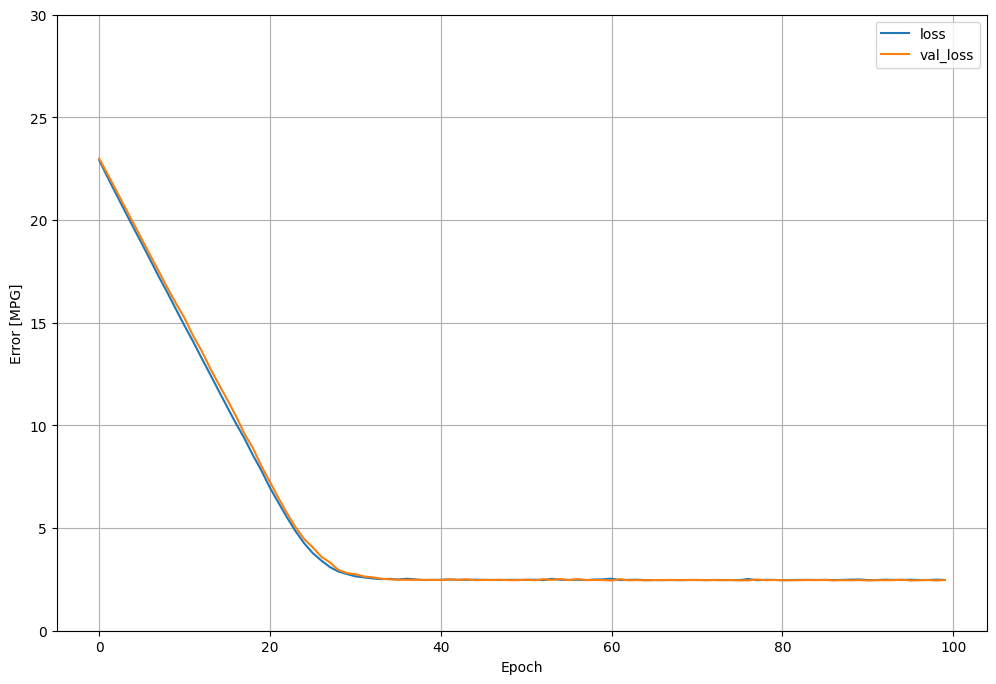

In [ ]:
plot_loss(history)

In [ ]:
# Mengumpulkan hasil test set untuk nanti
test_result['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0
)

In [ ]:
test_result['linear_model']

2.5122222900390625

# Regression with Deep Neural Network
---

In [ ]:
def build_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(1)
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(0.001),
      loss='mean_absolute_error'
  )

  return model

In [ ]:
dnn_horsepower_model = build_compile_model(horsepower_normalizer)

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,356 (17.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 3 (16.00 B)

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=1,
    shuffle=True,
    validation_split=0.2
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 23.4681 - val_loss: 23.3559
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.5865 - val_loss: 23.0692
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.0078 - val_loss: 22.7288
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.5376 - val_loss: 22.2898
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.6845 - val_loss: 21.7068
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.9542 - val_loss: 20.9426
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 20.2385 - val_loss: 19.9705
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.8077 - val_loss: 18.7434
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.6411 - val_loss: 17.3078
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.4058 - val_loss: 15.7229
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.7545 - val_loss: 14.0556
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13

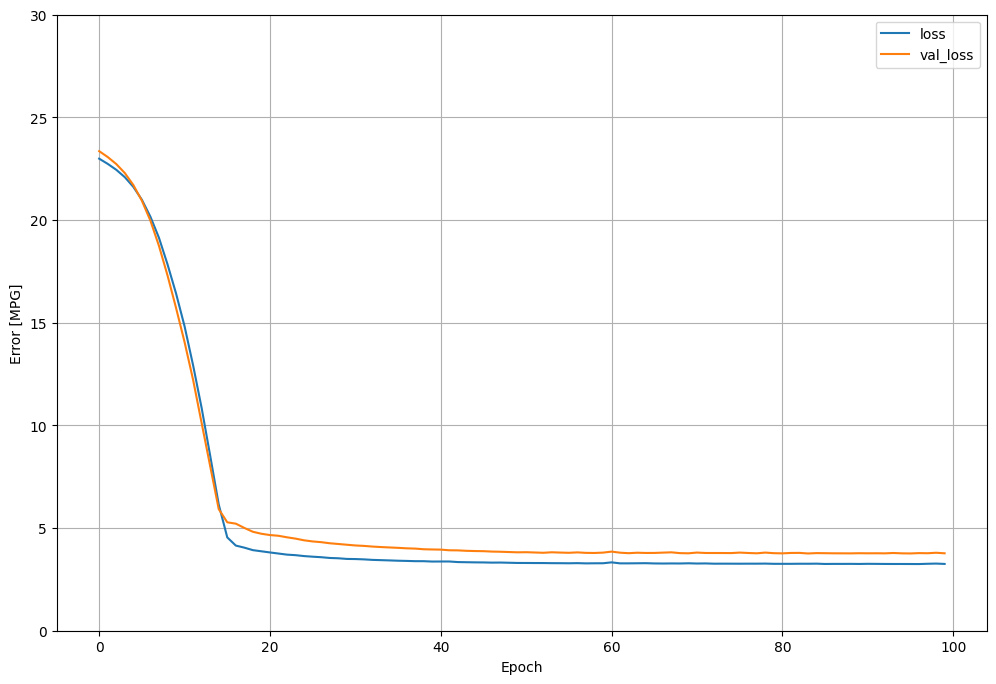

In [ ]:
plot_loss(history)

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model(x)

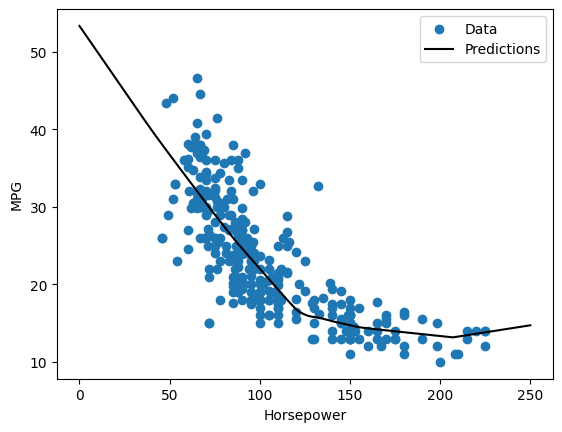

In [ ]:
plot_horsepower(x, y)

In [ ]:
test_result['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,
    verbose=0
)

In [ ]:
dnn_model = build_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (10, 7)                     │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (64.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 15 (64.00 B)

In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1,
    epochs=100
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 22.9495 - val_loss: 23.0116
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 23.0281 - val_loss: 22.3486
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 21.1096 - val_loss: 21.5391
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.0728 - val_loss: 20.5140
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.4258 - val_loss: 19.1528
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.4119 - val_loss: 17.3743
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.7409 - val_loss: 15.4529
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.3512 - val_loss: 13.6145
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.2802 - val_loss: 11.5433
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9115 - val_loss: 8.8551
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2577 - val_loss: 6.5385
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

In [ ]:
test_result['dnn_model'] = dnn_model.evaluate(
    test_features,
    test_labels,
    verbose=1
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6899


In [ ]:
final_result = pd.DataFrame(test_result, index=['Mean Absolute Error [MPG]']).T
final_result

,Mean Absolute Error [MPG]
horsepower_model,3.643037
linear_model,2.512222
dnn_horsepower_model,2.876738
dnn_model,1.792424
reloaded,1.792424


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


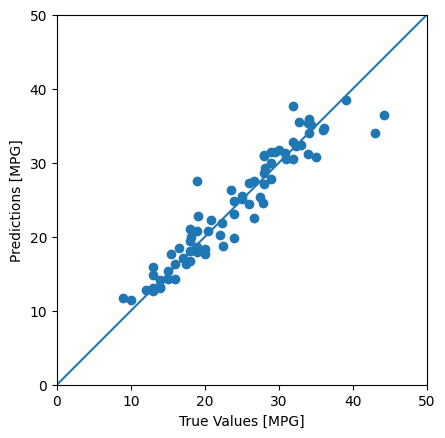

In [ ]:
test_prediction = dnn_model.predict(test_features).flatten() # Predict The Dataset with Deep Neural Network

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_prediction)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.ylim(lims)
plt.xlim(lims)
_ = plt.plot(lims, lims)

In [ ]:
dnn_model.save('dnn_model.keras')

In [ ]:
# Reloading the model
reloaded = tf.keras.models.load_model('dnn_model.keras')

test_result['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0
)